# Cross-correlation between song and spike density functions (firing rates)


<img src="img/song_fr_cross_corr_example.png" width=500 height=700 />

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from util import save
from util.draw import remove_right_top
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# from decimal import Decimal
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

## Load Data

In [3]:
from database.load import ProjectLoader
db = ProjectLoader().load_db()
df = db.to_dataframe(f"""SELECT song_fr_cross_corr.*, cluster.birdID, cluster.taskName
                FROM song_fr_cross_corr INNER JOIN cluster ON cluster.id = song_fr_cross_corr.clusterID""")
df.set_index('clusterID')

,nbMotifUndir,crossCorrMax,peakLatency,birdID,taskName
clusterID,,,,,
6,27,0.451,83.0,b70r38,Postdeafening
9,21,0.429,-18.0,b70r38,Postdeafening
10,43,0.511,-10.0,b70r38,Postdeafening
11,27,0.377,-38.0,b70r38,Postdeafening
12,70,0.488,-31.0,b70r38,Postdeafening
...,...,...,...,...,...
124,34,0.477,-7.0,k27o36,Postdeafening
126,13,0.423,30.0,k27o36,Postdeafening
129,20,0.559,-50.0,o25w75,Postdeafening


In [4]:
df.columns

Index(['clusterID', 'nbMotifUndir', 'crossCorrMax', 'peakLatency', 'birdID',
       'taskName'],
      dtype='object')

# Compare peak latency vs. max cross-correlation 

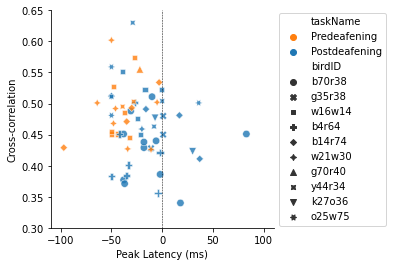

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(x="peakLatency", y="crossCorrMax", data=df, 
                hue = "taskName",
                style="birdID", 
                s=55, alpha=0.8, ax=ax)
remove_right_top(ax)
ax.set_xlabel('Peak Latency (ms)'), ax.set_ylabel('Cross-correlation')
ax.set_xlim([-110, 110])
ax.set_ylim([0.3, 0.65])
ax.axvline(x=0, linestyle = '--', color = 'k', linewidth = 0.5)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = np.array(range(0, len(labels)))
np.put(order, [0, 1, 2], [0, 2, 1])
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc='center left', bbox_to_anchor=(1, 0.5)
          ) 
plt.show()

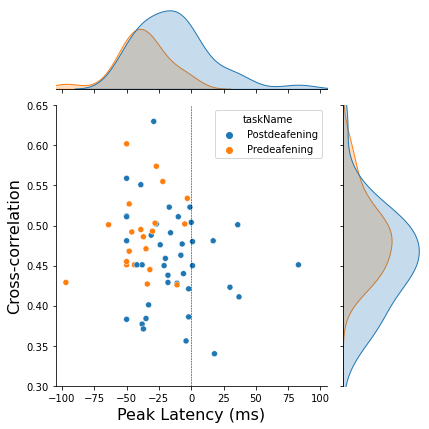

In [76]:
h = sns.jointplot(x="peakLatency", y="crossCorrMax", data=df,
                  hue='taskName',
#                   s=30, 
                  legend=True, 
                  height=6, ratio=3, 
                  xlim=(-105, 105), ylim=(0.3, 0.65)
                  )

# ax.axvline(x=0, linestyle = '--', color = 'k', linewidth = 0.5)
# JointGrid has a convenience function
h.set_axis_labels('Peak Latency (ms)', 'Cross-correlation', fontsize=16)
h.ax_joint.axvline(x=0, linestyle = '--', color = 'k', linewidth = 0.5)


In [99]:
g.ax_joint.get_legend

<bound method _AxesBase.get_legend of <AxesSubplot:xlabel='Peak Latency (ms)', ylabel='Cross-correlation'>>

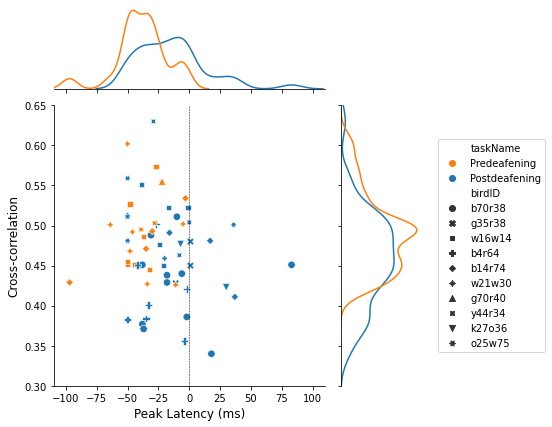

In [117]:
kernel_bw = 0.3
fig_size = 6

g = sns.JointGrid(x="peakLatency", y="crossCorrMax",  data=df, xlim=(-110, 110), ylim=(0.3, 0.65), height=fig_size, ratio=3)
g.plot_joint(sns.scatterplot, hue='taskName', style="birdID", s = 55, data=df, legend=True)

# plot legend on the right
handles, labels = g.ax_joint.get_legend_handles_labels()
order = np.array(range(0, len(labels)))  #specify order of items in legend
np.put(order, [0, 1, 2], [0, 2, 1])
g.ax_joint.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc='center left', bbox_to_anchor=(1.4, 0.5)
          ) 
# plot density function
sns.kdeplot(df.loc[df['taskName']=='Postdeafening', 'peakLatency'], ax=g.ax_marg_x, bw=kernel_bw)
sns.kdeplot(df.loc[df['taskName']=='Predeafening', 'peakLatency'], ax=g.ax_marg_x, bw=kernel_bw)
sns.kdeplot(df.loc[df['taskName']=='Postdeafening', 'crossCorrMax'], ax=g.ax_marg_y, vertical=True, bw=kernel_bw)
sns.kdeplot(df.loc[df['taskName']=='Predeafening', 'crossCorrMax'], ax=g.ax_marg_y, vertical=True, bw=kernel_bw)

g.ax_joint.axvline(x=0, linestyle = '--', color = 'k', linewidth = 0.5)
g.set_axis_labels('Peak Latency (ms)', 'Cross-correlation', fontsize=12)

plt.show()




# ## stats
# pre_deafening, post_deafening = [],[]
# pre_deafening = df.query('taskName == "Predeafening"')['crossCorrMax']
# post_deafening = df.query('taskName == "Postdeafening"')['crossCorrMax']

# (tval, pval, sig, degree_of_freedom) = ttest2(pre_deafening,post_deafening)

# msg = ('CrossCorrR => '+ 't({:.0f})'.format(degree_of_freedom) + ' = {:.2f}'.format(tval) , 'P = {:.2e}'.format(Decimal(pval)) ,sig, 'two-sample t-test')
# plt.text(0.8, 0.8, msg ,  ha='center', va='bottom',size = 13)

# pre_deafening, post_deafening = [],[]
# pre_deafening = df.query('taskName == "Predeafening"')['peakLatency']
# post_deafening = df.query('taskName == "Postdeafening"')['peakLatency']

# (tval, pval, sig, degree_of_freedom) = ttest2(pre_deafening,post_deafening)

# msg = ('MaxLoc => '+ 't({:.0f})'.format(degree_of_freedom) + ' = {:.2f}'.format(tval) , 'P = {:.2e}'.format(Decimal(pval)) ,sig, 'two-sample t-test')
# plt.text(0.8, 0.75, msg ,  ha='center', va='bottom',size = 13)
# # plt.text((x1+x2)*.5, y_max*1.1, msg ,  ha='center', va='bottom', color=col, size = stat_txt_size)
# # msg = ('t({:.0f})'.format(df) + ' = {:.2f}'.format(tval) )
# # plt.text((x1+x2)*.5, y_max*1.2, msg ,  ha='center', va='bottom', color=col, size = stat_txt_size)

# plt.show()

# # Save results
# # os.chdir(r"C:\Users\jahn02\Box\Data\Deafening Project\Analysis\SongFR_CrossCorr\2021-12-03")
# # plt.savefig("SyllableFR_CrossCorr.pdf", bbox_inches='tight')

In [26]:
def ttest2(x,y):
    ## By Jaerong 
    ## Two-sample t-test 
    
    from scipy import stats
    
    tval,pval = stats.ttest_ind(x,y)
    df = len(x) + len(y) - 2

    if pval < 0.001:
        sig = '***'
    elif pval < 0.01:
        sig = '**'
    elif pval < 0.05:
        sig = '*'
    else:
        sig = 'ns' 

    return(tval, pval, sig, df)
    